In [135]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import seaborn as sns
from sklearn.impute import KNNImputer
import re

In [136]:
#import the data
dataset = pd.read_csv('Watches.csv')

In [137]:
#Get The data shape
dataset.shape

(4740, 15)

In [138]:
#Get The data Description
dataset.describe()

,Stars,Ratings,Sold,PriceMin,PriceMax,Stock,SellerRatings,Products,ResponseRate,Followers,URL
count,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,0.0
mean,0.767932,0.832911,1.444726,167.864468,167.864468,1.444726,900.773418,417.551477,0.823549,1389.160338,NaN
std,1.779388,3.402383,6.665595,269.630953,269.630953,6.665595,1476.329314,490.426187,0.154511,2525.384698,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.570000,0.000000,NaN
25%,0.000000,0.000000,0.000000,23.000000,23.000000,0.000000,2.000000,48.000000,0.730000,2.000000,NaN
50%,0.000000,0.000000,0.000000,70.000000,70.000000,0.000000,26.000000,197.000000,0.840000,140.000000,NaN
75%,0.000000,0.000000,0.000000,128.000000,128.000000,0.000000,1200.000000,833.000000,0.950000,1100.000000,NaN
max,5.000000,23.000000,46.000000,900.000000,900.000000,46.000000,5100.000000,1900.000000,1.000000,8400.000000,NaN


In [139]:
#check If the data Has any NAN values 
dataset.isnull().sum()

Label               0
Stars               0
Ratings             0
Sold                0
PriceMin            0
PriceMax            0
Stock               0
Seller              0
SellerRatings       0
Products            0
ResponseRate        0
ResponseTime        0
Joined              0
Followers           0
URL              4740
dtype: int64

In [140]:
#remove Unnecessary features
dataset.drop(['URL'], axis=1, inplace=True)

In [141]:
# remove the Special character from the ProductName(Label)
dataset['Label'] = dataset['Label'].str.replace(r"[^a-zA-Z0-9_\s]+", " ").str.strip()

In [142]:
#Make Correlation Analysis between the features
corrMatrix=dataset.corr()
corrMatrix

,Stars,Ratings,Sold,PriceMin,PriceMax,Stock,SellerRatings,Products,ResponseRate,Followers
Stars,1.000000,0.568415,0.499596,-0.167193,-0.167193,0.499596,0.338945,0.295878,0.220799,0.030911
Ratings,0.568415,1.000000,0.990406,-0.113054,-0.113054,0.990406,0.452935,0.053114,0.191188,0.015698
Sold,0.499596,0.990406,1.000000,-0.103742,-0.103742,1.000000,0.446670,0.021173,0.185222,0.012549
PriceMin,-0.167193,-0.113054,-0.103742,1.000000,1.000000,-0.103742,-0.228224,-0.284103,-0.573041,-0.216145
PriceMax,-0.167193,-0.113054,-0.103742,1.000000,1.000000,-0.103742,-0.228224,-0.284103,-0.573041,-0.216145
Stock,0.499596,0.990406,1.000000,-0.103742,-0.103742,1.000000,0.446670,0.021173,0.185222,0.012549
SellerRatings,0.338945,0.452935,0.446670,-0.228224,-0.228224,0.446670,1.000000,0.524706,0.526423,0.871283
Products,0.295878,0.053114,0.021173,-0.284103,-0.284103,0.021173,0.524706,1.000000,0.211976,0.483122
ResponseRate,0.220799,0.191188,0.185222,-0.573041,-0.573041,0.185222,0.526423,0.211976,1.000000,0.469153
Followers,0.030911,0.015698,0.012549,-0.216145,-0.216145,0.012549,0.871283,0.483122,0.469153,1.000000


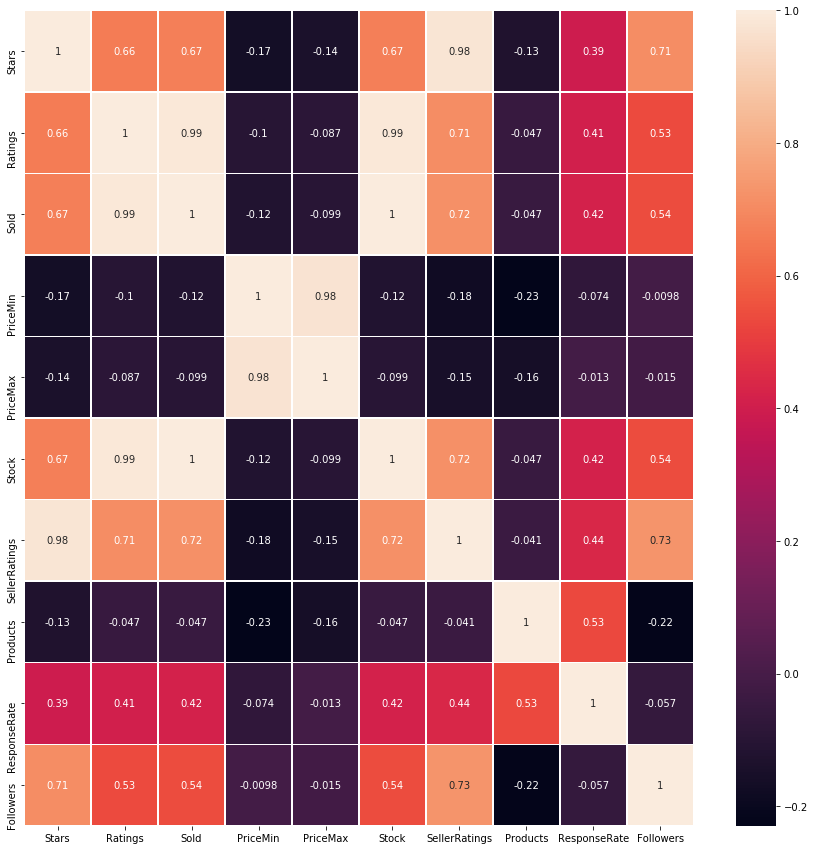

In [122]:
# Visualize the Correlation Analysis
plt.figure(figsize = (15,15))
sns.heatmap(corrMatrix, annot=True ,linewidths=.5)

plt.show()

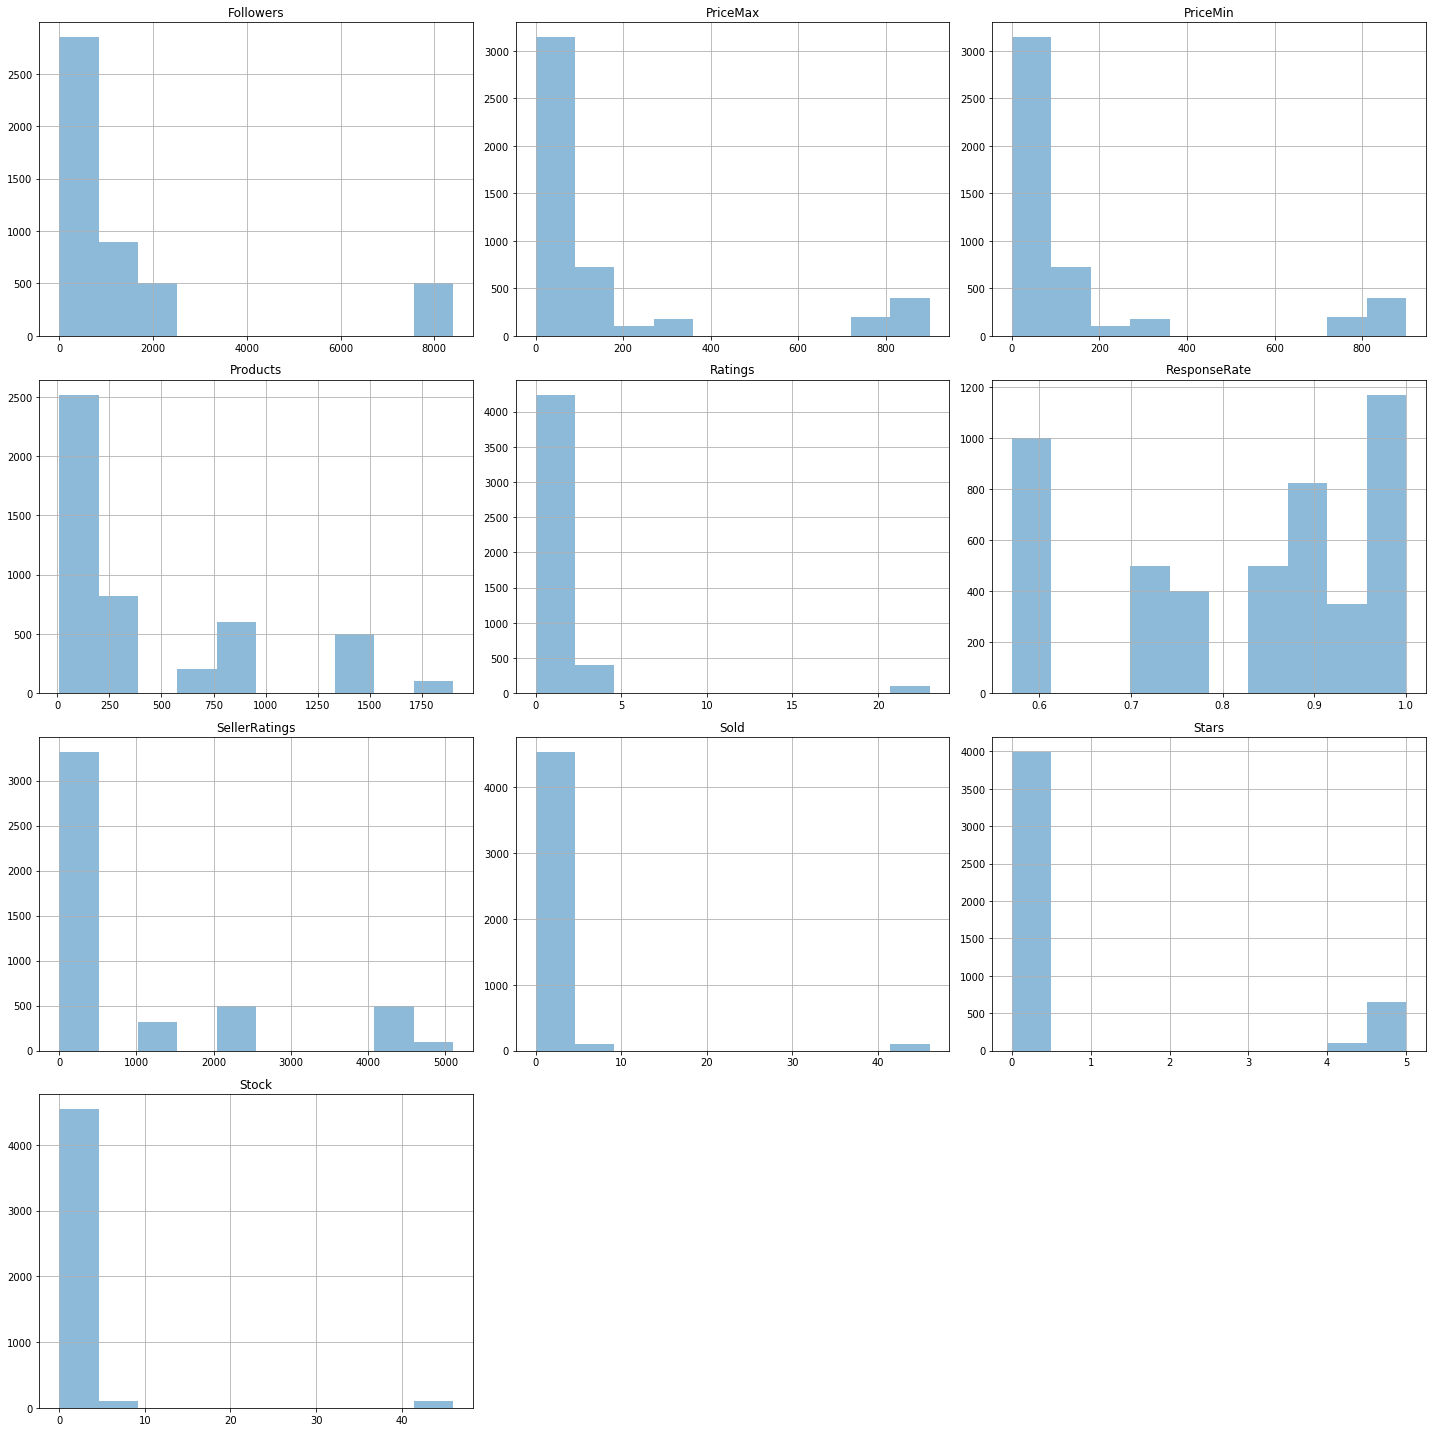

In [143]:
# Univariate Histograms
dataset.hist(alpha=0.5, figsize=(20, 20))
plt.tight_layout()
plt.show()

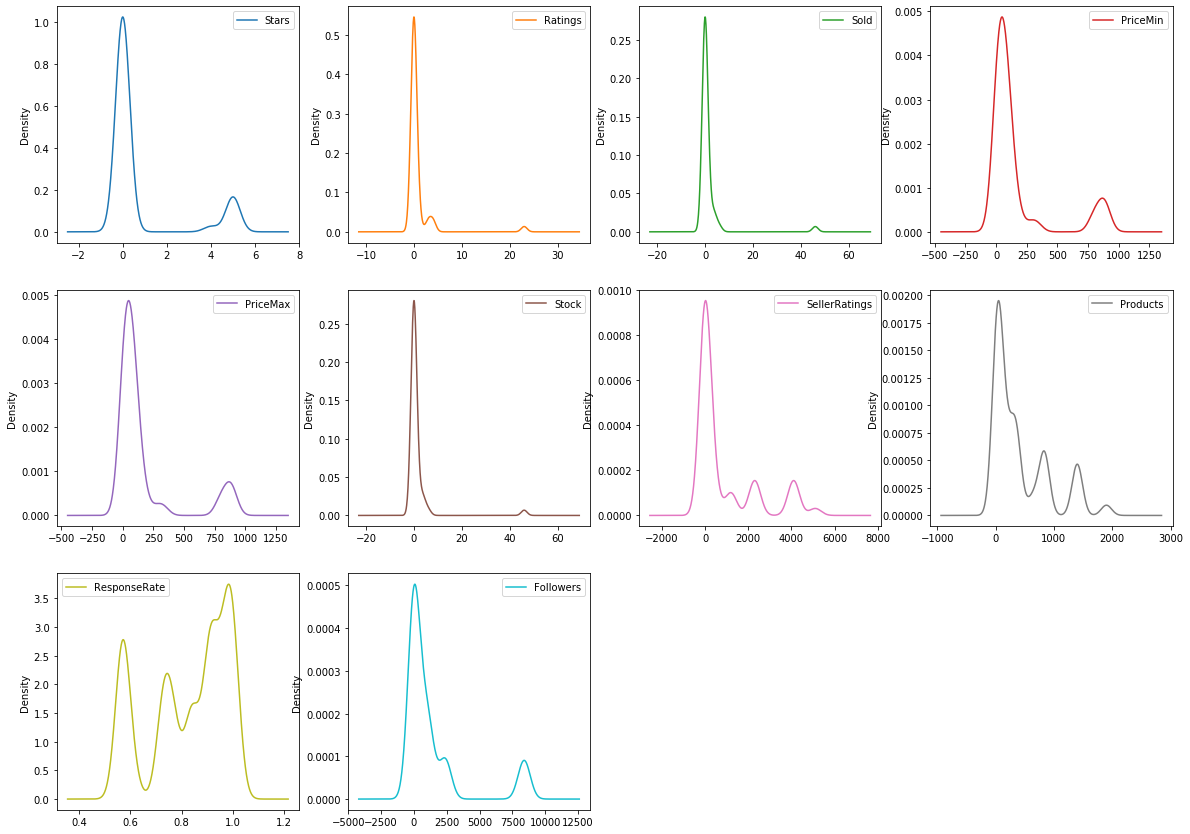

In [144]:
# Univariate Density Plots
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False ,figsize=(20, 20))
plt.show()

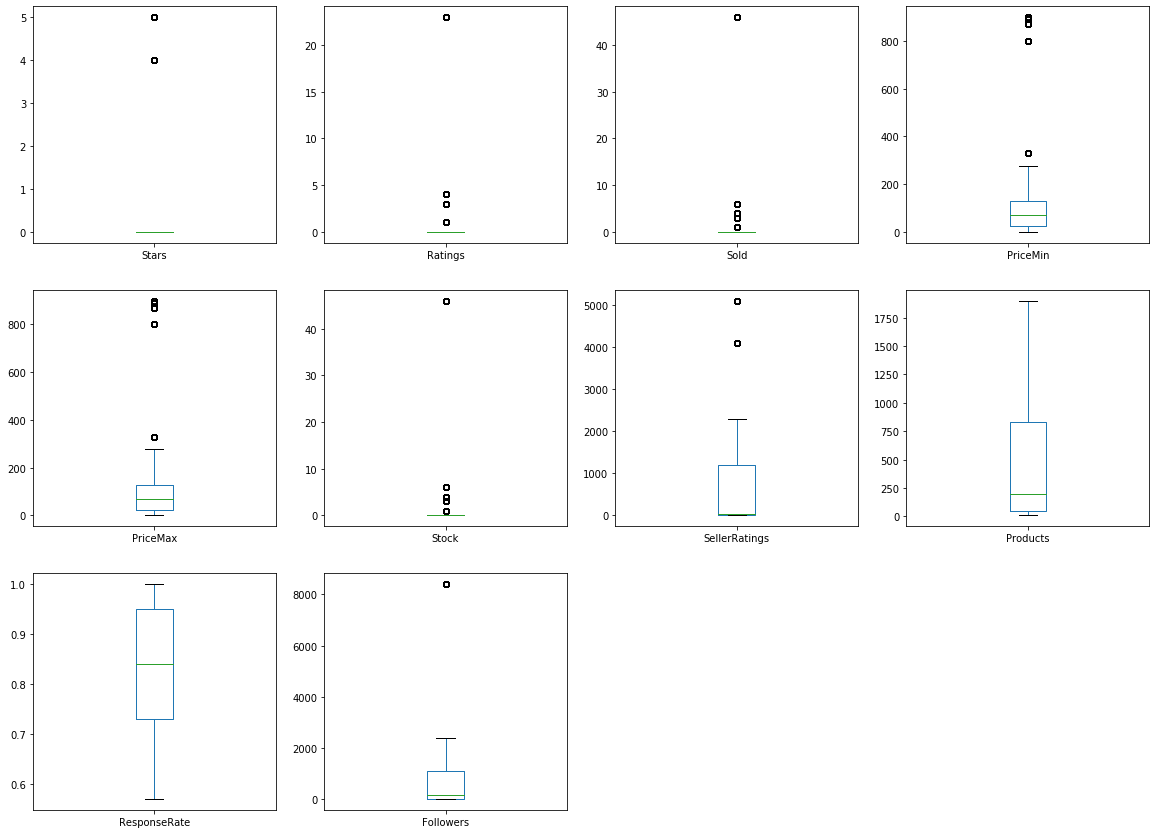

In [145]:
# Box and Whisker Plots
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,figsize=(20, 20) )
plt.show()

In [146]:
# prepare the data for the modling by removing the Unnecessary columns 
dataset.drop(['Label'], axis=1, inplace=True)
dataset.drop(['Seller'], axis=1, inplace=True)
dataset.drop(['ResponseTime'], axis=1, inplace=True)
dataset.drop(['Joined'], axis=1, inplace=True)

In [147]:
# Data Normalization
from sklearn import preprocessing
normalized =pd.DataFrame(preprocessing.normalize(dataset))

In [148]:
normalized.describe()

,0,1,2,3,4,5,6,7,8,9
count,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000
mean,0.000498,0.000414,0.000559,0.230000,0.230000,0.000559,0.226584,0.410051,0.002948,0.397315
std,0.001713,0.001693,0.002004,0.284088,0.284088,0.002004,0.277930,0.368088,0.004154,0.377864
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007856,0.000104,0.000000
25%,0.000000,0.000000,0.000000,0.007320,0.007320,0.000000,0.009622,0.088766,0.000321,0.005504
50%,0.000000,0.000000,0.000000,0.065827,0.065827,0.000000,0.044683,0.288659,0.000759,0.281951
75%,0.000000,0.000000,0.000000,0.481098,0.481098,0.000000,0.436892,0.900987,0.003979,0.762401
max,0.011032,0.011032,0.011032,0.707085,0.707085,0.011032,0.958635,0.999263,0.014755,0.909907


In [149]:
# Divide the data to X and Y for modling

X = normalized.iloc[:, [0,1,2,3,4,5,6,7,8,]].values
y = normalized.iloc[:,[9]].values

In [150]:
# Divide the data to train and test
X_train, X_test, y_train, y_test = train_test_split(normalized, y, test_size = 0.2, random_state = 0)

In [151]:
# Fitting SVR(Support vector regression) to the dataset to predict the number of follwers based on the rest of the data
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

# Predicting a new result
y_pred = svr.predict(X_test)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [152]:
# Measure the model accuaracy by R-squared Matrics

from sklearn import metrics
print( metrics.r2_score(y_test,y_pred))

0.9494337004574893


In [ ]:
#it is appear that the number of follwers could be predicted by the rest of the data 